# Almgren-Chriss Model Example

This notebook demonstrates how to use the Almgren-Chriss 2000 optimal execution model for portfolio liquidation.

## Section 1: Import Required Libraries

In [ ]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add the src directory to the path to import our models
src_path = Path('.').resolve().parent / 'src' if Path('src').exists() else Path('src')
sys.path.insert(0, str(src_path))

from lob_modeling.models.almgren_chriss import AlmgrenChriss2000

## Section 2: Initialize the Model

The Almgren-Chriss model requires several parameters related to market impact, risk, and execution constraints.

In [2]:
# Initialize the Almgren-Chriss model with default parameters
model = AlmgrenChriss2000(
    ALPHA=1,           # Power of temporary impact function
    ETA=5e-6,          # Linear coefficient of temporary impact
    GAMMA=5e-5,        # Linear coefficient of permanent impact
    BETA=1,            # Power of permanent impact function
    LAMBDA=0.00009,    # Risk aversion measure
    SIGMA=0.495,       # Annual volatility
    EPSILON=0.0625,    # Bid-ask spread + fees
    MU=0,              # Expected drift term
    N=50,              # Number of time steps
    T=0.025,           # Time horizon in days
    X=500              # Number of shares to execute
)

print("Model initialized with the following parameters:")
print(f"  Time horizon (T): {model.T} days")
print(f"  Number of steps (N): {model.N}")
print(f"  Initial shares (X): {model.X}")
print(f"  Time per step (TAU): {model.TAU:.6f}")
print(f"  Risk aversion (LAMBDA): {model.LAMBDA}")

Model initialized with the following parameters:
  Time horizon (T): 0.025 days
  Number of steps (N): 50
  Initial shares (X): 500
  Time per step (TAU): 0.022361
  Risk aversion (LAMBDA): 9e-05


## Section 3: Run Model Predictions

The model provides two methods for computing optimal execution strategy:
- **basic_almgren()**: Uses quadratic programming (simpler, faster)
- **bellman_solve()**: Uses dynamic programming (more general)

In [3]:
# Run the Basic Almgren method (Quadratic Programming)
print("Computing optimal execution using quadratic programming...")
opt_sale_basic, inventory_basic, expected_shortfall_basic, variance_basic = model.basic_almgren(plot=False)

print(f"\nBasic Almgren Results:")
print(f"  Expected shortfall: ${expected_shortfall_basic:.2f}")
print(f"  Variance of shortfall: {variance_basic:.2f}")
print(f"  Trades per period: {opt_sale_basic}")
print(f"  Final inventory: {inventory_basic[-1]}")

Computing optimal execution using quadratic programming...

Basic Almgren Results:
  Expected shortfall: $-166.58
  Variance of shortfall: 1372.60
  Trades per period: [4.77120131e+02 2.28798692e+01 0.00000000e+00 1.27076902e-16
 1.40951650e-16 0.00000000e+00 5.29525361e-16 3.73390169e-16
 2.46939787e-16 0.00000000e+00 1.25317844e-16 1.33083958e-17
 0.00000000e+00 1.01029638e-16 7.84367968e-17 0.00000000e+00
 2.29756814e-17 8.47634805e-17 0.00000000e+00 1.02770845e-16
 0.00000000e+00 0.00000000e+00 7.84852549e-17 1.13146245e-16
 9.92993041e-17 1.68685214e-16 1.91232574e-16 1.27044220e-16
 1.89490698e-16 9.75471137e-17 8.36672550e-17 6.11141816e-17
 1.54786795e-16 0.00000000e+00 1.53049943e-16 1.32230039e-16
 0.00000000e+00 0.00000000e+00 6.97820272e-17 1.68658561e-16
 2.18961188e-16 1.49568404e-16 0.00000000e+00 1.32218033e-16
 6.28268692e-17 9.75194973e-17 3.33332134e-17 2.10773047e-18
 1.73843340e-16 0.00000000e+00]
  Final inventory: -6.15485031119468e-14


In [4]:
# Run the Bellman method (Dynamic Programming)
print("\nComputing optimal execution using dynamic programming...")
value_func, opt_moves, inventory_bellman, opt_sale_bellman, expected_shortfall_bellman, variance_bellman = model.bellman_solve(plot=False)

print(f"\nBellman (DP) Results:")
print(f"  Expected shortfall: ${expected_shortfall_bellman:.2f}")
print(f"  Variance of shortfall: {variance_bellman:.2f}")
print(f"  Trades per period: {opt_sale_bellman}")
print(f"  Final inventory: {inventory_bellman[-1]}")


Computing optimal execution using dynamic programming...

Bellman (DP) Results:
  Expected shortfall: $31.59
  Variance of shortfall: 22452.22
  Trades per period: [[11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 8]
 [ 8]
 [ 7]
 [ 5]
 [ 0]]
  Final inventory: [0]


## Section 4: Visualize Results

Plot the optimal execution strategies from both methods to compare their behavior.

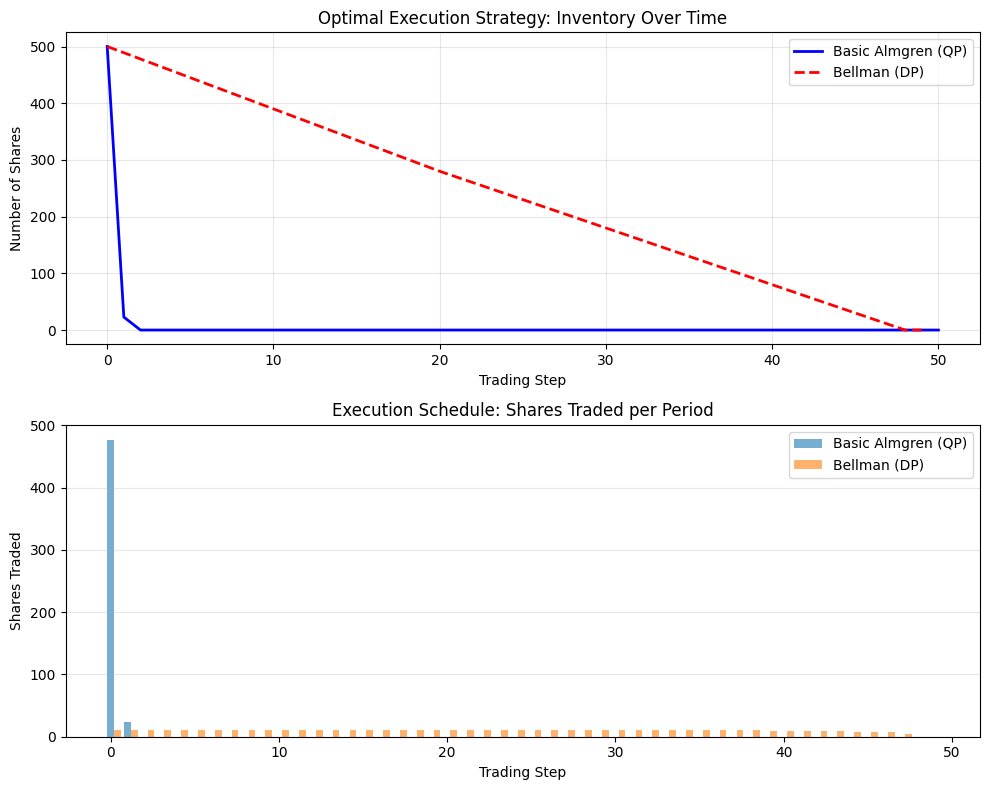

Visualization complete!


In [5]:
# Create visualizations comparing both methods
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: Inventory over time
axes[0].plot(range(len(inventory_basic)), inventory_basic, 'b-', linewidth=2, label='Basic Almgren (QP)')
axes[0].plot(range(len(inventory_bellman)), inventory_bellman.flatten(), 'r--', linewidth=2, label='Bellman (DP)')
axes[0].set_xlabel('Trading Step')
axes[0].set_ylabel('Number of Shares')
axes[0].set_title('Optimal Execution Strategy: Inventory Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Trades per period
# Flatten opt_sale_bellman if it's 2D
opt_sale_bellman_flat = np.asarray(opt_sale_bellman).flatten()[:len(opt_sale_basic)]

x_pos_basic = np.arange(len(opt_sale_basic))
x_pos_bellman = np.arange(len(opt_sale_bellman_flat)) + 0.4
axes[1].bar(x_pos_basic, opt_sale_basic, alpha=0.6, label='Basic Almgren (QP)', width=0.4)
axes[1].bar(x_pos_bellman, opt_sale_bellman_flat, alpha=0.6, label='Bellman (DP)', width=0.4)
axes[1].set_xlabel('Trading Step')
axes[1].set_ylabel('Shares Traded')
axes[1].set_title('Execution Schedule: Shares Traded per Period')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Visualization complete!")

## Section 5: Evaluate Model Performance

Compare the results from both methods to understand their trade-offs.

In [6]:
# Compare the two methods
import pandas as pd

comparison_data = {
    'Metric': ['Expected Shortfall ($)', 'Variance of Shortfall', 'Total Cost (Expected + Risk)'],
    'Basic Almgren (QP)': [
        f"${expected_shortfall_basic:.2f}",
        f"{variance_basic:.2f}",
        f"${expected_shortfall_basic + 0.00009 * variance_basic:.2f}"
    ],
    'Bellman (DP)': [
        f"${expected_shortfall_bellman:.2f}",
        f"{variance_bellman:.2f}",
        f"${expected_shortfall_bellman + 0.00009 * variance_bellman:.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of Methods:")
print(comparison_df.to_string(index=False))

print("\n" + "="*60)
print("Key Insights:")
print(f"  1. The quadratic method assumes linear impact in execution costs")
print(f"  2. The dynamic programming method is more flexible and general")
print(f"  3. Execution cost = expected shortfall + λ × variance")
print(f"  4. Higher risk aversion (λ={model.LAMBDA}) penalizes variance more")
print("="*60)


Comparison of Methods:
                      Metric Basic Almgren (QP) Bellman (DP)
      Expected Shortfall ($)           $-166.58       $31.59
       Variance of Shortfall            1372.60     22452.22
Total Cost (Expected + Risk)           $-166.46       $33.61

Key Insights:
  1. The quadratic method assumes linear impact in execution costs
  2. The dynamic programming method is more flexible and general
  3. Execution cost = expected shortfall + λ × variance
  4. Higher risk aversion (λ=9e-05) penalizes variance more
